In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
hotel = pd.read_csv("hotel.csv")

In [6]:
#1
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot:title={'center':'Customer Type'}, ylabel='customer_type'>

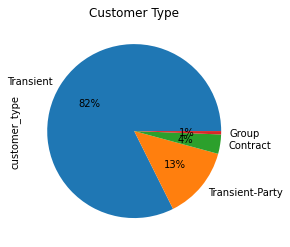

In [64]:
hotel['customer_type'].value_counts().plot(kind='pie', title="Customer Type", autopct='%1.0f%%')

<AxesSubplot:title={'center':'By Country'}, ylabel='country'>

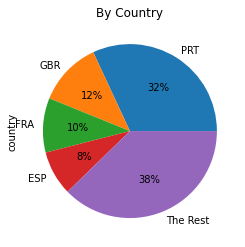

In [68]:
placeholder = hotel['country'].value_counts()
threshhold = placeholder.quantile(0.98)
inPie = placeholder[placeholder > threshhold]
inPie['The Rest'] = placeholder[placeholder <= threshhold].sum()
inPie.plot(kind='pie', title="By Country", autopct='%1.0f%%')

<AxesSubplot:title={'center':'Repeated Guest?'}, ylabel='is_repeated_guest'>

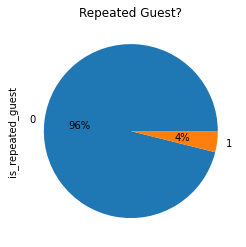

In [56]:
hotel['is_repeated_guest'].value_counts().plot(kind='pie', title="Repeated Guest?", autopct='%1.0f%%')

<AxesSubplot:title={'center':'Reservation Status'}, ylabel='reservation_status'>

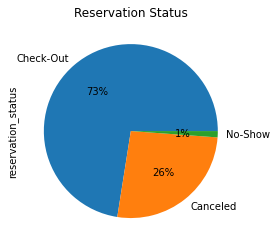

In [62]:
hotel['reservation_status'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Reservation Status')

In [9]:
#2
hotel.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

In [10]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
# 3 dan 4
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
hotel[hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [14]:
# Clean up the data first
hotel.drop_duplicates(inplace=True)

In [15]:
hotel[hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [16]:
# reset index

In [17]:
hotel.reset_index(drop=True, inplace=True)

In [18]:
hotel["stays_in_weekend_nights"].max()

19

In [19]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
hotel.shape[0]

87396

In [21]:
#5.a.
hotel.dropna(axis=1, thresh=len(hotel)*.5, inplace=True)

In [22]:
#5.b.
hotel['country'].mode()[0]

'PRT'

In [23]:
hotel['country'].isna().sum()

452

In [24]:
hotel['country'].fillna(hotel['country'].mode()[0], inplace=True)

In [25]:
hotel['country']

0        PRT
1        PRT
2        GBR
3        GBR
4        GBR
        ... 
87391    BEL
87392    FRA
87393    DEU
87394    GBR
87395    DEU
Name: country, Length: 87396, dtype: object

In [26]:
hotel['country'].isna().sum()

0

In [27]:
hotel['children'].isna().sum()

4

In [28]:
hotel['children'].fillna(hotel['children'].mode()[0], inplace=True)

In [29]:
hotel['children'].isna().sum()

0

In [30]:
#5.c.
hotel['agent'].isna().sum()

12193

In [31]:
hotel['agent'].fillna(hotel['agent'].mode()[0], inplace=True)

In [32]:
hotel['agent'].isna().sum()

0

In [33]:
hotel['agent']

0          9.0
1          9.0
2          9.0
3        304.0
4        240.0
         ...  
87391    394.0
87392      9.0
87393      9.0
87394     89.0
87395      9.0
Name: agent, Length: 87396, dtype: float64

In [34]:
#6
#Lead time ini apa ya? Satuannya apa?
hotel['lead_time']

0        342
1        737
2          7
3         13
4         14
        ... 
87391     23
87392    102
87393     34
87394    109
87395    205
Name: lead_time, Length: 87396, dtype: int64

In [35]:
# long: > 6 bulan
# med: > sebulan
# short: sisanya
hotel['category'] = np.where(hotel['lead_time'] > 180, "long", np.where(hotel['lead_time'] > 30, "medium", "short"))

In [36]:
#7
hotel['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
87391    2017-09-06
87392    2017-09-07
87393    2017-09-07
87394    2017-09-07
87395    2017-09-07
Name: reservation_status_date, Length: 87396, dtype: object

In [37]:
#hotel.loc[hotel['arrival_date_year'] >= 2017]
pd.to_datetime(hotel['reservation_status_date'],format='%Y/%m/%d', errors = 'coerce')

0       2015-07-01
1       2015-07-01
2       2015-07-02
3       2015-07-02
4       2015-07-03
           ...    
87391   2017-09-06
87392   2017-09-07
87393   2017-09-07
87394   2017-09-07
87395   2017-09-07
Name: reservation_status_date, Length: 87396, dtype: datetime64[ns]

In [38]:
hotel.loc[hotel['reservation_status_date'] >= '2017-01-01']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,category
7352,Resort Hotel,1,89,2017,January,1,2,1,3,2,...,No Deposit,240.0,0,Transient,46.80,0,1,No-Show,2017-01-02,medium
7369,Resort Hotel,1,6,2017,January,1,4,0,1,1,...,No Deposit,9.0,0,Transient,39.00,0,0,Canceled,2017-01-03,short
7373,Resort Hotel,1,112,2017,January,1,4,2,4,2,...,No Deposit,240.0,0,Transient,52.00,0,2,No-Show,2017-01-04,medium
7377,Resort Hotel,1,4,2017,January,1,5,0,3,2,...,No Deposit,240.0,0,Transient,48.00,0,0,Canceled,2017-01-01,short
7381,Resort Hotel,1,2,2017,January,1,6,2,3,1,...,No Deposit,240.0,0,Transient,43.00,0,1,No-Show,2017-01-06,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,short
87392,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,medium
87393,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,medium
87394,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,medium


In [39]:
hotel['category']

0          long
1          long
2         short
3         short
4         short
          ...  
87391     short
87392    medium
87393    medium
87394    medium
87395      long
Name: category, Length: 87396, dtype: object

In [40]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,long
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,long
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,short
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,short
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,short
87392,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,medium
87393,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,medium
87394,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,medium


In [41]:
# 8
month = hotel['arrival_date_month'].groupby(hotel['arrival_date_month']).count()
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_index.reverse()
month = month.reindex(month_index, axis=0)

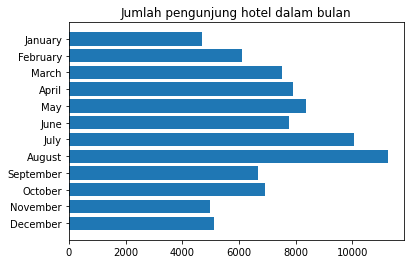

In [42]:
plt.title('Jumlah pengunjung hotel dalam bulan')
plt.barh(month_index, month)
plt.figure
plt.show()